In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt
import pandas as pd


# Define the SMARTS reaction for generic dehydration of an alcohol
rxn_smarts = "[O,N,S:2][C:1]>>[H][O+,N+,S+:2][C:1]"
ionisation = AllChem.ReactionFromSmarts(rxn_smarts)

rxn_smarts = "[O+,N+,S+:2][C:1]>>[C+:1].[O,N,S:2]"
inductiveCleavage = AllChem.ReactionFromSmarts(rxn_smarts)

rxn_smarts = "[O,N,S:1][C:2][*+:3]>>[O+,N+,S+:1]=[C+:2].[*:3]"
HeteroatomInductiveCleavage = AllChem.ReactionFromSmarts(rxn_smarts)



# Define the SMARTS reaction for generic dehydration of an alcohol
#rxn_smarts = "[O;H1][C:1]>>[C+:1]"
#rxn = AllChem.ReactionFromSmarts(rxn_smarts)

rxns = [inductiveCleavage, HeteroatomInductiveCleavage]

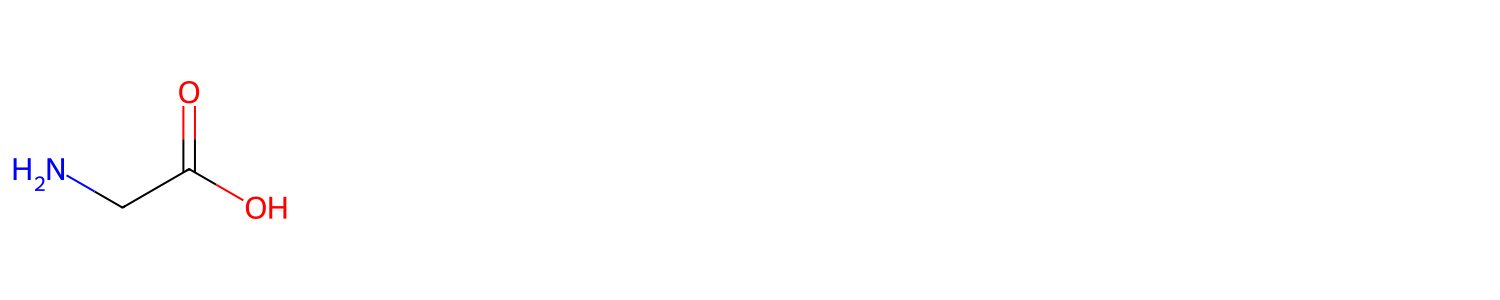

In [2]:
# List of alcohol molecules (ethanol, 1-propanol, 2-butanol)
smiles_list = ["C(C(=O)O)N"]

# Convert SMILES to RDKit molecule objects
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Draw the original molecules and their dehydration products
original_images = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300, 300))
original_images

In [3]:
# Apply the dehydration reaction to each molecule
products = []
for mol in mols:
    product_sets = ionisation.RunReactants((mol,))
    # Take the first product set (if any), and select the first product
    if product_sets:
        print(product_sets)
        for p in product_sets:
            products.append(p[0])

print(products)
product_images = Draw.MolsToGridImage(products, molsPerRow=5, subImgSize=(300, 300))

((<rdkit.Chem.rdchem.Mol object at 0x7f42e7818eb0>,), (<rdkit.Chem.rdchem.Mol object at 0x7f42e77bb2e0>,))
[<rdkit.Chem.rdchem.Mol object at 0x7f42e7818eb0>, <rdkit.Chem.rdchem.Mol object at 0x7f42e77bb2e0>]


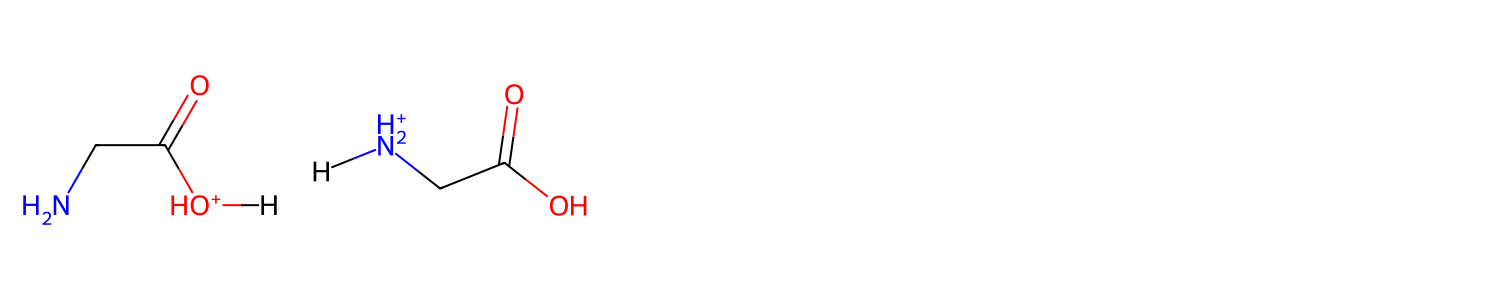

In [4]:
product_images

In [5]:
# Apply the dehydration reaction to each molecule
products2 = []
for mol in products:
    for rxn in rxns:
        product_sets = rxn.RunReactants((mol,))
        # Take the first product set (if any), and select the first product
        if product_sets:
            print(product_sets)
            for p in product_sets:
                products2.append(p[0])

print(products2)
product2_images = Draw.MolsToGridImage(products2, molsPerRow=5, subImgSize=(300, 300))

((<rdkit.Chem.rdchem.Mol object at 0x7f42e77bb3c0>, <rdkit.Chem.rdchem.Mol object at 0x7f42e77bb5f0>),)
((<rdkit.Chem.rdchem.Mol object at 0x7f42e77bb6d0>, <rdkit.Chem.rdchem.Mol object at 0x7f42e77bb740>),)
[<rdkit.Chem.rdchem.Mol object at 0x7f42e77bb3c0>, <rdkit.Chem.rdchem.Mol object at 0x7f42e77bb6d0>]


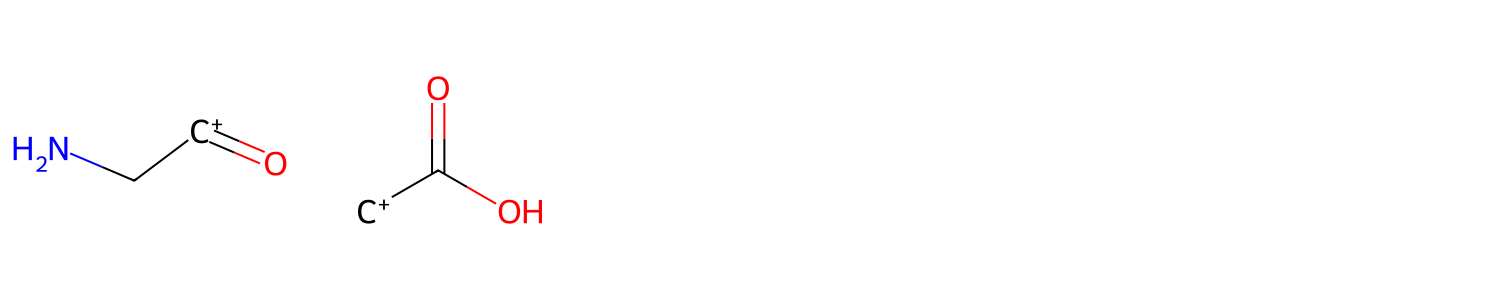

In [6]:
product2_images

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdMolDescriptors
from rdkit.Chem import Draw

# Calculate the monoisotopic mass for each product
masses = []
for product in products2:
    if product:
        Chem.SanitizeMol(product)
        formula = rdMolDescriptors.CalcMolFormula(product)
        print(formula)
        mass = rdMolDescriptors.CalcExactMolWt(product)  # Calculate monoisotopic mass
        masses.append(mass)
    else:
        masses.append(None)

# Display the original molecules and their products with monoisotopic masses
for i, (mol, product, mass) in enumerate(zip(mols, products2, masses)):
    if product:
        print(f"Original Molecule {i+1}: {Chem.MolToSmiles(mol)}")
        print(f"Product {i+1}: {Chem.MolToSmiles(product)}")
        print(f"Monoisotopic Mass of Product {i+1}: {mass} Da\n")
    else:
        print(f"Product {i+1}: No product formed.\n")

C2H4NO+
C2H3O2+
Original Molecule 1: NCC(=O)O
Product 1: NC[C+]=O
Monoisotopic Mass of Product 1: 58.028740168089996 Da



## TESTING 

Ionised mass: 76.03930485209
Simple Inductive Cleavage Product mass: 58.028740168089996
No products generated for 'displacement_reaction_positive_b'.
Remote Hydrogen Rearrangement B Product mass: 31.042199159999996
Radical Fragmentation Product mass: 59.03711378

Updated peaks_df:
           mz  intensity
0  76.039305       10.0
1  58.028740       20.0
2  31.042199       20.0
3  59.037114       20.0


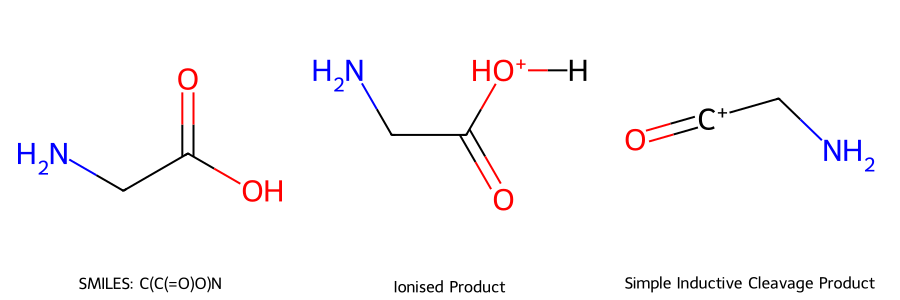

In [23]:
# Define cinnamic acid molecule
cinnamic_acid_smiles = 'C(C(=O)O)N'
cinnamic_acid = Chem.MolFromSmiles(cinnamic_acid_smiles)

# Step 1: Apply ionisation to create the ionised product
ionisation_smarts = '[O,N,S:2][C:1]>>[H][O+,N+,S+:2][C:1]'
ionisation_rxn = AllChem.ReactionFromSmarts(ionisation_smarts)
product_sets = ionisation_rxn.RunReactants((cinnamic_acid,))

# Check if ionisation was successful
if product_sets:
    ionised_product = product_sets[0][0]  # Get the first ionised product
    Chem.SanitizeMol(ionised_product)  # Sanitize the ionised product
    ionised_mass = CalcExactMolWt(ionised_product)
    print("Ionised mass:", ionised_mass)
else:
    raise ValueError("Ionisation reaction failed to produce a product.")

# Create a DataFrame to hold the initial ionised peak
peaks_df = pd.DataFrame({'mz': [ionised_mass], 'intensity': [10.0]})

# Define reactions to be applied to the ionised product
simple_inductive_cleavage_smarts = '[O+,N+,S+:2]-[C:1]>>[C+:1].[O,N,S:2]'
displacement_reaction_positive_b_smarts = '[O,N,S,C:1]=[C:2]-[C:3]-[*+:4]>>[O+,N+,S+:1]-[C:2]=[C:3].[*:4]'
remote_hydrogen_rearrangement_b_smarts = '[C:1]-[C:2]-[O:3]-[H:4]>>[C:1]-[H:4].[C:2]=[O:3]'
radical_fragmentation_smarts = '[C:1]-[O,N,S:2]>>[C^1:1].[O^1,N^1,S^1:2]'

# Convert SMARTS to reaction objects
simple_inductive_cleavage_rxn = AllChem.ReactionFromSmarts(simple_inductive_cleavage_smarts)
displacement_reaction_positive_b_rxn = AllChem.ReactionFromSmarts(displacement_reaction_positive_b_smarts)
remote_hydrogen_rearrangement_b_rxn = AllChem.ReactionFromSmarts(remote_hydrogen_rearrangement_b_smarts)
radical_fragmentation_rxn = AllChem.ReactionFromSmarts(radical_fragmentation_smarts)

# Apply each reaction to the ionised product and calculate fragment masses

# Reaction 1: Simple Inductive Cleavage
product_sets_1 = simple_inductive_cleavage_rxn.RunReactants((ionised_product,))
simple_inductive_product = None
if product_sets_1:
    simple_inductive_product = product_sets_1[0][0]  # Select the first product
    Chem.SanitizeMol(simple_inductive_product)
    simple_inductive_mass = CalcExactMolWt(simple_inductive_product)
    peaks_df = pd.concat([peaks_df, pd.DataFrame({'mz': [simple_inductive_mass], 'intensity': [20.0]})], ignore_index=True)
    print("Simple Inductive Cleavage Product mass:", simple_inductive_mass)
else:
    print("No products generated for 'simple_inductive_cleavage'.")

# Reaction 2: Displacement Reaction Positive B
product_sets_2 = displacement_reaction_positive_b_rxn.RunReactants((ionised_product,))
displacement_product = None
if product_sets_2:
    displacement_product = product_sets_2[0][0]  # Select the first product
    Chem.SanitizeMol(displacement_product)
    displacement_mass = CalcExactMolWt(displacement_product)
    peaks_df = pd.concat([peaks_df, pd.DataFrame({'mz': [displacement_mass], 'intensity': [20.0]})], ignore_index=True)
    print("Displacement Reaction Positive B Product mass:", displacement_mass)
else:
    print("No products generated for 'displacement_reaction_positive_b'.")

# Reaction 3: Remote Hydrogen Rearrangement B
product_sets_3 = remote_hydrogen_rearrangement_b_rxn.RunReactants((ionised_product,))
remote_hydrogen_rearrangement_b_product = None
if product_sets_3:
    remote_hydrogen_rearrangement_b_product = product_sets_3[0][0]  # Select the first product
    Chem.SanitizeMol(remote_hydrogen_rearrangement_b_product)
    remote_hydrogen_rearrangement_b_mass = CalcExactMolWt(remote_hydrogen_rearrangement_b_product)
    peaks_df = pd.concat([peaks_df, pd.DataFrame({'mz': [remote_hydrogen_rearrangement_b_mass], 'intensity': [20.0]})], ignore_index=True)
    print("Remote Hydrogen Rearrangement B Product mass:", remote_hydrogen_rearrangement_b_mass)
else:
    print("No products generated for 'remote_hydrogen_rearrangement_b'.")

# Reaction 4: Radical Fragmentation
product_sets_4 = radical_fragmentation_rxn.RunReactants((ionised_product,))
radical_fragmentation_product = None
if product_sets_4:
    radical_fragmentation_product = product_sets_4[0][0]  # Select the first product
    Chem.SanitizeMol(radical_fragmentation_product)
    radical_fragmentation_mass = CalcExactMolWt(radical_fragmentation_product)
    peaks_df = pd.concat([peaks_df, pd.DataFrame({'mz': [radical_fragmentation_mass], 'intensity': [20.0]})], ignore_index=True)
    print("Radical Fragmentation Product mass:", radical_fragmentation_mass)
else:
    print("No products generated for 'radical_fragmentation'.")

# Display updated peaks_df
print("\nUpdated peaks_df:\n", peaks_df)

# Draw cinnamic acid, ionised product, and reaction products
mols_to_draw = [cinnamic_acid, ionised_product]
labels = ["SMILES: C(C(=O)O)N", "Ionised Product"]
if simple_inductive_product:
    mols_to_draw.append(simple_inductive_product)
    labels.append("Simple Inductive Cleavage Product")
# if displacement_product:
#     mols_to_draw.append(displacement_product)
#     labels.append("Displacement Reaction Positive B Product")
# if remote_hydrogen_rearrangement_b_product:
#     mols_to_draw.append(remote_hydrogen_rearrangement_b_product)
#     labels.append("Remote Hydrogen Rearrangement B Product")
# if radical_fragmentation_product:
#     mols_to_draw.append(radical_fragmentation_product)
#     labels.append("Radical Fragmentation Product")

  # Change to desired font size

# Draw and display
img = Draw.MolsToGridImage(mols_to_draw, legends=labels, subImgSize=(300, 300))
img